In [1]:
# Creating Panoramas using OpenCV

In [2]:
# Importing Libraries
import cv2
import os
import math
import glob
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

In [3]:
# Download image

In [4]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [5]:
URL = r"https://www.dropbox.com/s/0o5yqql1ynx31bi/opencv_bootcamp_assets_NB9.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_assets_NB9.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

## Steps for Creating Panoramas
1. Find keypoints in all images
2. Find pairwise correspondences
3. Estimate pairwise Homographies
4. Refine Homographies
5. Stitch with Blending

In [6]:
# Read Images
imagefiles = glob.glob(f"boat{os.sep}*")
imagefiles.sort()

images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
    
num_images = len(images)

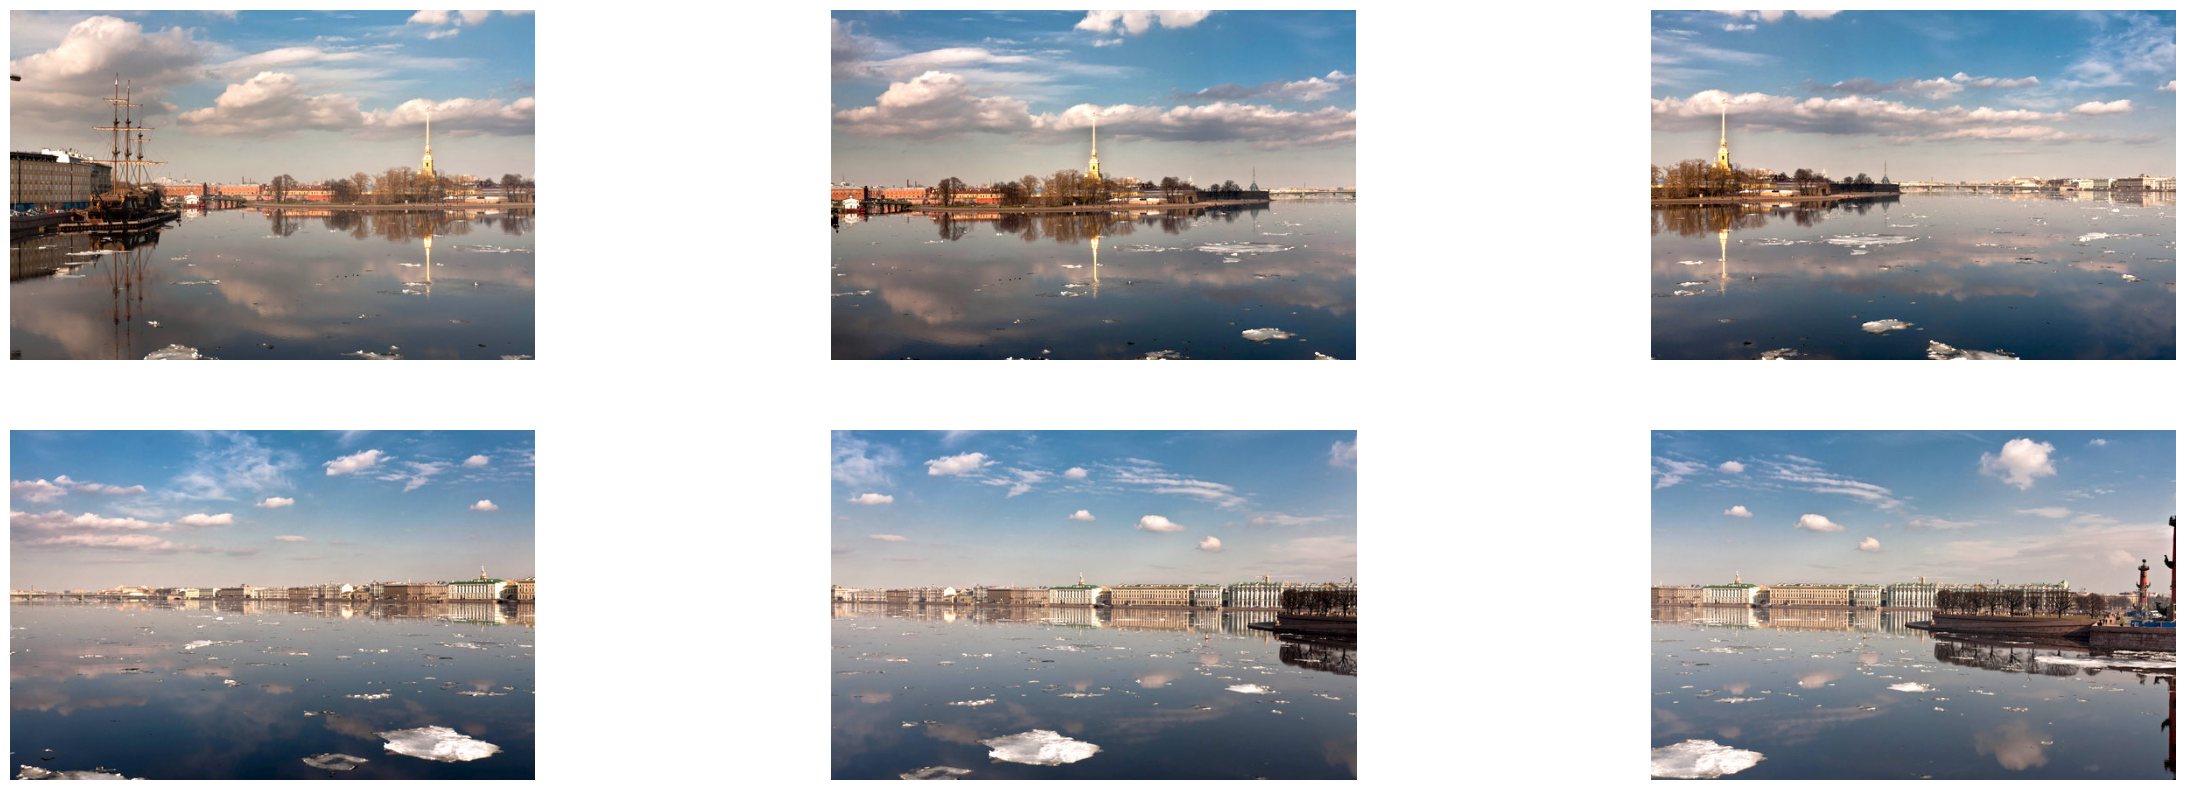

In [7]:
# Display Images
plt.figure(figsize=[30, 10])
num_col = 3
num_rows = math.ceil(num_images / num_col)
for i in range(0, num_images):
    plt.subplot(num_rows, num_col, i + 1)
    plt.axis('off')
    plt.imshow(images[i])

#### To merge these images useing sticher class

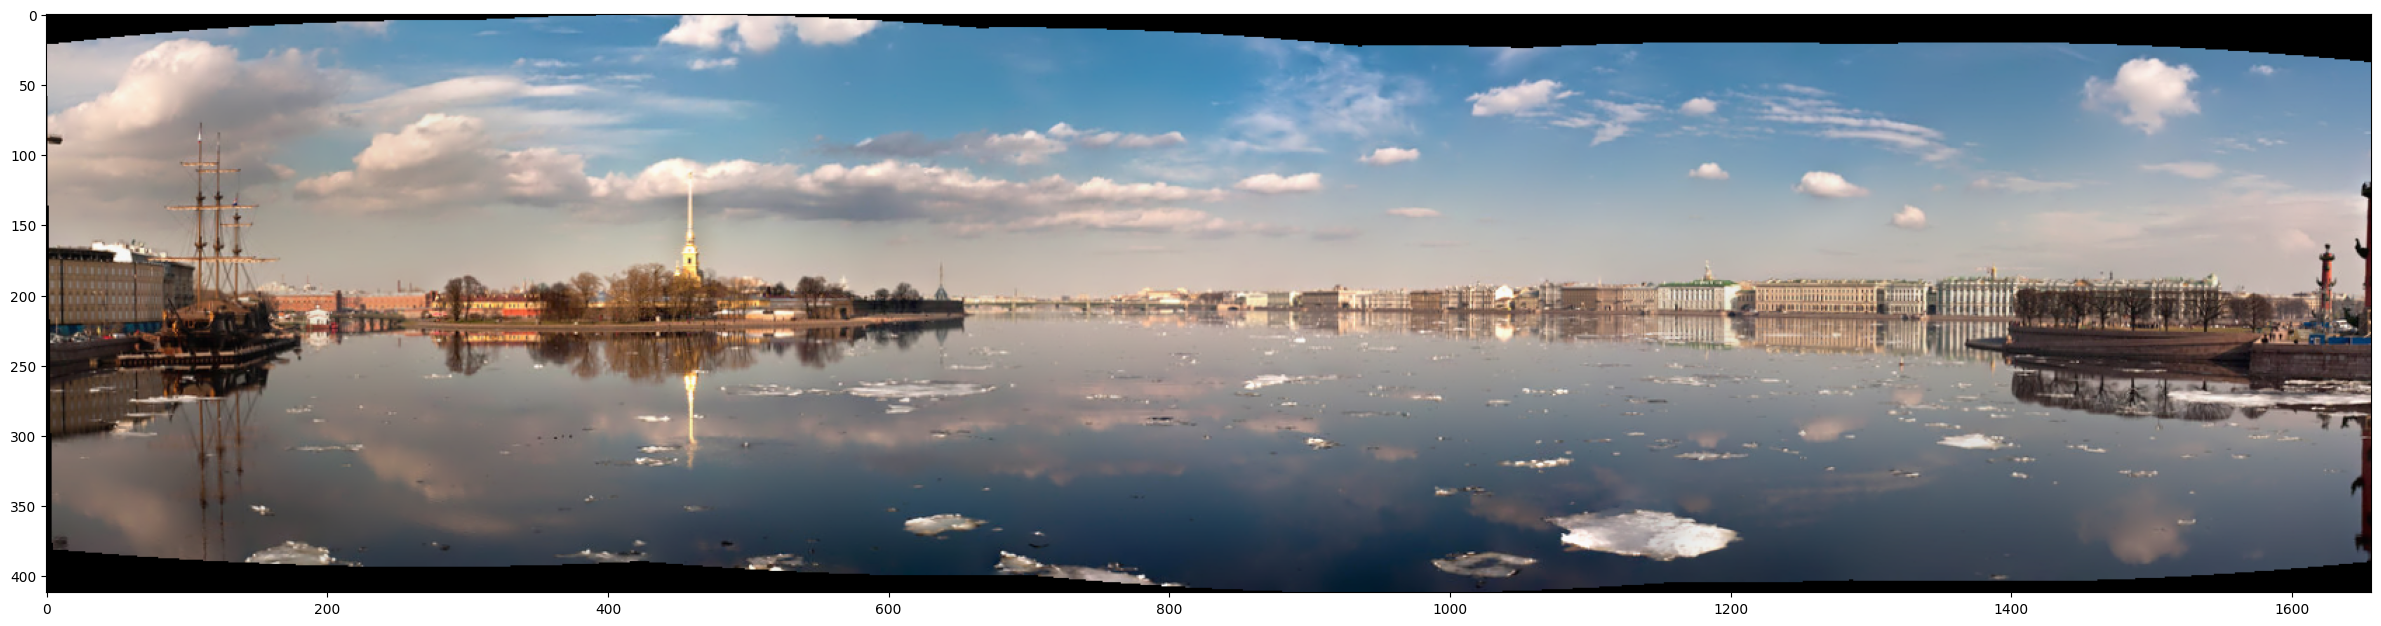

In [8]:
# Stictch Images
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.imshow(result)